# Analisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import folium
import requests
import json

In [2]:
data = glob.glob('datos/IPM*.csv')
data

['datos\\IPM_2015.csv',
 'datos\\IPM_2016.csv',
 'datos\\IPM_2017.csv',
 'datos\\IPM_2018.csv',
 'datos\\IPM_2019.csv',
 'datos\\IPM_2020.csv',
 'datos\\IPM_2021.csv',
 'datos\\IPM_2022.csv',
 'datos\\IPM_2023.csv']

In [3]:
df = pd.concat((pd.read_csv(file) for file in data))
df.reset_index(inplace = True)
df

,index,ESTADO,ID,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,CÁRCEL_SIN_SENTENCIA,FINANCIAMIENTO_POLICIA,DELINCUENCIA_ORGANIZADA,EFICIENCIA_SISTEMA_JUDICIAL,CALIFICACION_GENERAL,IMPACTO_ECONOMICO_PER_CAPITA,IMPACTO_ECONOMICO_BILLONES,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,AGUASCALIENTES,AS,1.100,4.700,2.100,2.100,3.4,1.900,3.9,2.445,21856,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BAJA_CALIFORNIA,BC,2.700,3.600,3.200,5.000,3.2,2.000,5.0,2.954,36731,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BAJA_CALIFORNIA_SUR,BS,1.700,3.200,2.000,5.000,5.0,1.800,3.6,2.357,17010,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CAMPECHE,CC,1.500,1.100,1.500,1.000,4.9,1.500,3.7,1.810,13860,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CHIAPAS,CS,1.500,1.500,2.200,1.000,2.1,1.300,4.7,1.930,12151,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,27,TAMAULIPAS,TS,1.636,2.740,1.413,1.855,NaN,1.940,NaN,1.905,"23,130",85.8,NaN,NaN,NaN,NaN,NaN
284,28,TLAXCALA,TL,1.496,1.352,1.318,5.000,NaN,1.261,NaN,1.661,"20,069",28.3,NaN,NaN,NaN,NaN,NaN
285,29,VERACRUZ,VZ,1.585,2.475,1.832,2.670,NaN,2.177,NaN,2.032,"21,013",181.4,NaN,NaN,NaN,NaN,NaN
286,30,YUCATÁN,YN,1.091,1.068,1.038,5.000,NaN,1.378,NaN,1.449,"11,366",26.2,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['index', 'ID', 'FINANCIAMIENTO_POLICIA', 'EFICIENCIA_SISTEMA_JUDICIAL'], axis=1)
df

,ESTADO,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,CÁRCEL_SIN_SENTENCIA,DELINCUENCIA_ORGANIZADA,CALIFICACION_GENERAL,IMPACTO_ECONOMICO_PER_CAPITA,IMPACTO_ECONOMICO_BILLONES,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,AGUASCALIENTES,1.100,4.700,2.100,2.100,1.900,2.445,21856,NaN,NaN,NaN,NaN,NaN,NaN
1,BAJA_CALIFORNIA,2.700,3.600,3.200,5.000,2.000,2.954,36731,NaN,NaN,NaN,NaN,NaN,NaN
2,BAJA_CALIFORNIA_SUR,1.700,3.200,2.000,5.000,1.800,2.357,17010,NaN,NaN,NaN,NaN,NaN,NaN
3,CAMPECHE,1.500,1.100,1.500,1.000,1.500,1.810,13860,NaN,NaN,NaN,NaN,NaN,NaN
4,CHIAPAS,1.500,1.500,2.200,1.000,1.300,1.930,12151,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,TAMAULIPAS,1.636,2.740,1.413,1.855,1.940,1.905,"23,130",85.8,NaN,NaN,NaN,NaN,NaN
284,TLAXCALA,1.496,1.352,1.318,5.000,1.261,1.661,"20,069",28.3,NaN,NaN,NaN,NaN,NaN
285,VERACRUZ,1.585,2.475,1.832,2.670,2.177,2.032,"21,013",181.4,NaN,NaN,NaN,NaN,NaN
286,YUCATÁN,1.091,1.068,1.038,5.000,1.378,1.449,"11,366",26.2,NaN,NaN,NaN,NaN,NaN


In [13]:
df['IMPACTO_ECONOMICO_PER_CAPITA'] = df['IMPACTO_ECONOMICO_PER_CAPITA'].apply(lambda x: str(x))
df['IMPACTO_ECONOMICO_PER_CAPITA'] = df['IMPACTO_ECONOMICO_PER_CAPITA'].apply(lambda x: x.replace(',',''))
df['IMPACTO_ECONOMICO_PER_CAPITA'] = df['IMPACTO_ECONOMICO_PER_CAPITA'].apply(lambda x: float(x))

In [14]:
df.dtypes

ESTADO                           object
HOMICIDIO                       float64
DELITOS_CON_VIOLENCIA           float64
DELITOS_CON_ARMAS_DE_FUEGO      float64
CÁRCEL_SIN_SENTENCIA            float64
DELINCUENCIA_ORGANIZADA         float64
CALIFICACION_GENERAL            float64
IMPACTO_ECONOMICO_PER_CAPITA    float64
IMPACTO_ECONOMICO_BILLONES      float64
Unnamed: 10                     float64
Unnamed: 11                     float64
Unnamed: 12                     float64
Unnamed: 13                     float64
Unnamed: 14                     float64
dtype: object

In [15]:
df2 = df.groupby('ESTADO').mean()
df2

,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,CÁRCEL_SIN_SENTENCIA,DELINCUENCIA_ORGANIZADA,CALIFICACION_GENERAL,IMPACTO_ECONOMICO_PER_CAPITA,IMPACTO_ECONOMICO_BILLONES,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
ESTADO,,,,,,,,,,,,,
AGUASCALIENTES,1.251000,3.808222,1.510444,1.383889,2.500222,2.170111,25830.135889,49.033333,NaN,NaN,NaN,NaN,NaN
BAJA_CALIFORNIA,4.292444,3.826111,4.122667,2.346889,3.565000,3.879667,52006.883444,276.233333,NaN,NaN,NaN,NaN,NaN
BAJA_CALIFORNIA_SUR,2.302444,3.700222,2.218000,2.024333,4.090444,2.968444,32704.727778,42.433333,NaN,NaN,NaN,NaN,NaN
CAMPECHE,1.475000,1.384667,1.349667,3.242889,1.719222,1.744111,17787.164667,23.983333,NaN,NaN,NaN,NaN,NaN
CHIAPAS,1.550000,1.572556,1.491222,2.501222,1.554111,1.709111,12765.508000,97.466667,NaN,NaN,NaN,NaN,NaN
CHIHUAHUA,4.096667,2.506667,4.317444,2.096222,2.138889,3.287556,41325.886556,227.233333,NaN,NaN,NaN,NaN,NaN
CIUDAD_DE_MÉXICO,1.766778,4.553333,3.006444,1.213778,2.552889,2.643556,28740.743667,353.933333,NaN,NaN,NaN,NaN,NaN
COAHUILA,1.514556,2.545667,1.533778,1.507889,2.283111,1.980222,17106.167222,65.050000,NaN,NaN,NaN,NaN,NaN
COLIMA,4.340444,3.122778,4.617222,2.369889,3.062222,3.794556,60957.404444,70.566667,NaN,NaN,NaN,NaN,NaN


In [16]:
df2.describe()

,HOMICIDIO,DELITOS_CON_VIOLENCIA,DELITOS_CON_ARMAS_DE_FUEGO,CÁRCEL_SIN_SENTENCIA,DELINCUENCIA_ORGANIZADA,CALIFICACION_GENERAL,IMPACTO_ECONOMICO_PER_CAPITA,IMPACTO_ECONOMICO_BILLONES,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,0.0,0.0,0.0,0.0,0.0
mean,2.416653,2.827573,2.613434,1.912740,2.416872,2.564823,28494.640972,149.705208,NaN,NaN,NaN,NaN,NaN
std,0.973335,0.898504,1.036441,0.700645,0.811732,0.649132,11538.323983,126.743485,NaN,NaN,NaN,NaN,NaN
min,1.065778,1.246111,1.174333,1.213778,1.166000,1.367000,10731.574111,23.983333,NaN,NaN,NaN,NaN,NaN
25%,1.718167,2.442083,1.794194,1.468250,1.788167,2.068639,19778.774611,69.187500,NaN,NaN,NaN,NaN,NaN
50%,2.017444,2.770944,2.370222,1.715389,2.369389,2.537167,26085.071667,105.483333,NaN,NaN,NaN,NaN,NaN
75%,3.153389,3.695139,3.231889,2.172917,2.690889,2.976556,35496.714222,203.625000,NaN,NaN,NaN,NaN,NaN
max,4.340444,4.553333,4.617222,4.459778,4.321778,3.879667,60957.404444,624.183333,NaN,NaN,NaN,NaN,NaN


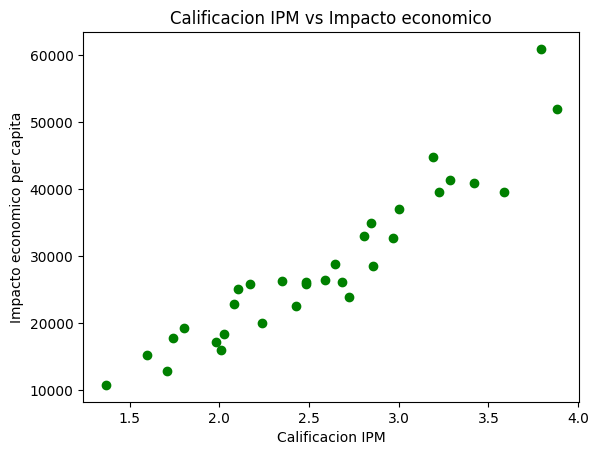

In [18]:
plt.plot(df2['CALIFICACION_GENERAL'], df2['IMPACTO_ECONOMICO_PER_CAPITA'], 'go')
plt.title('Calificacion IPM vs Impacto economico')  
plt.xlabel('Calificacion IPM')
plt.ylabel('Impacto economico per capita')
plt.show()

## Graficas

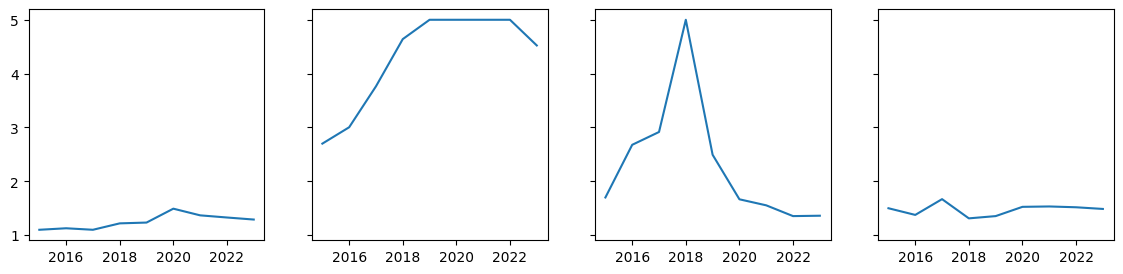

In [8]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'AGUASCALIENTES']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'BAJA_CALIFORNIA']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'BAJA_CALIFORNIA_SUR']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'CAMPECHE']['HOMICIDIO'] )

plt.show()

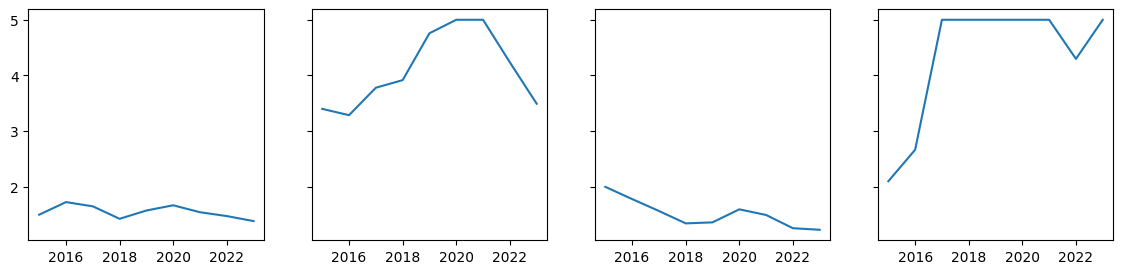

In [9]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'CHIAPAS']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'CHIHUAHUA']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'COAHUILA']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'COLIMA']['HOMICIDIO'] )

plt.show()

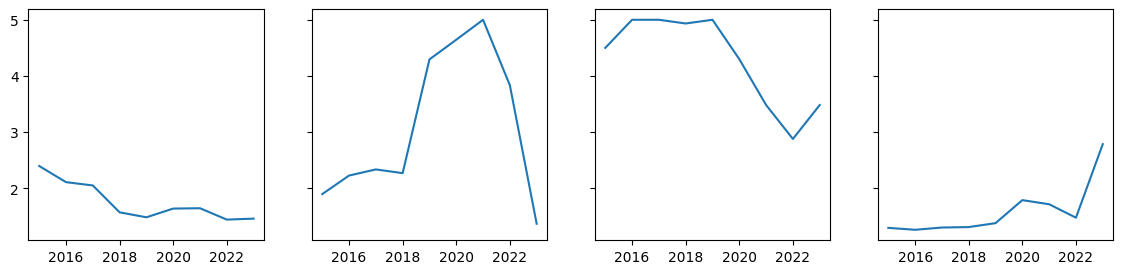

In [10]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'DURANGO']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'GUANAJUATO']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'GUERRERO']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'HIDALGO']['HOMICIDIO'] )

plt.show()

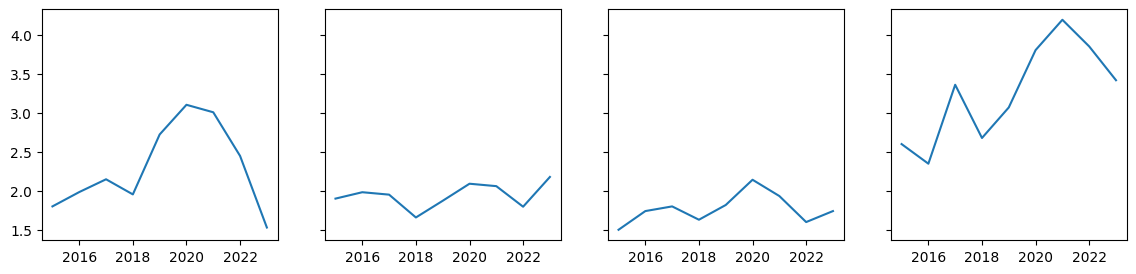

In [11]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'JALISCO']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'ESTADO_DE_MÉXICO']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'CIUDAD_DE_MÉXICO']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'MICHOACÁN']['HOMICIDIO'] )

plt.show()

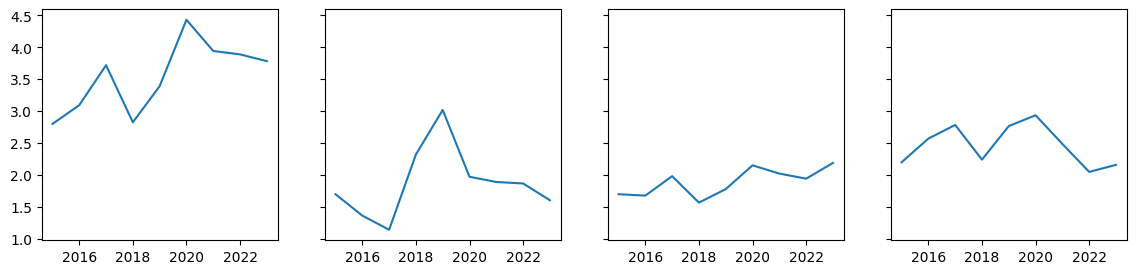

In [12]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'MORELOS']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'NAYARIT']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'NUEVO_LEÓN']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'OAXACA']['HOMICIDIO'] )

plt.show()

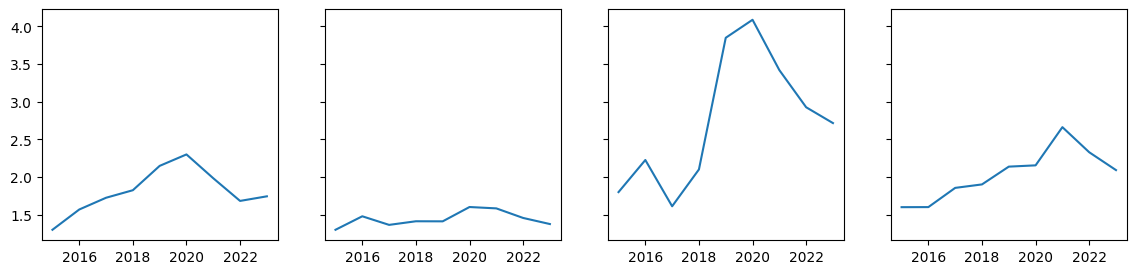

In [13]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'PUEBLA']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'QUERÉTARO']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'QUINTANA_ROO']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'SAN_LUIS_POTOSÍ']['HOMICIDIO'] )

plt.show()

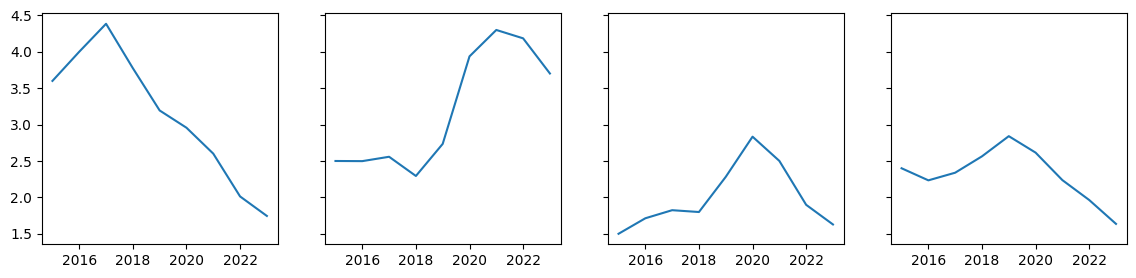

In [14]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'SINALOA']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'SONORA']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'TABASCO']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'TAMAULIPAS']['HOMICIDIO'] )

plt.show()

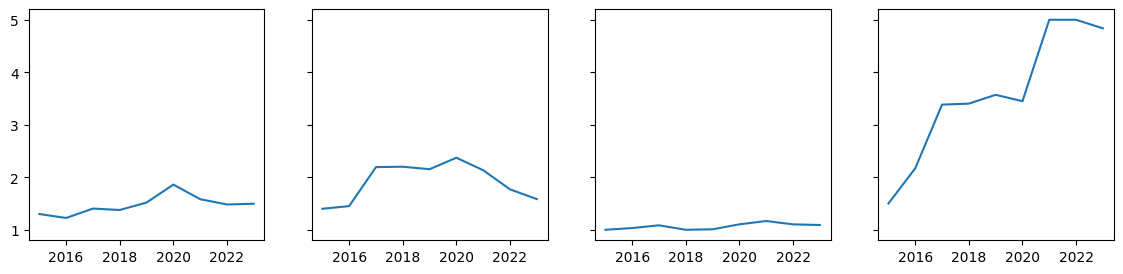

In [15]:
fig, ax = plt.subplots(1,4, figsize=(14,3), sharey=True, dpi=100)
# Call plot() method on the appropriate object
ax[0].plot(list(range(2015,2024)), df[df['ESTADO'] == 'TLAXCALA']['HOMICIDIO'] )
ax[1].plot(list(range(2015,2024)), df[df['ESTADO'] == 'VERACRUZ']['HOMICIDIO'] )
ax[2].plot(list(range(2015,2024)), df[df['ESTADO'] == 'YUCATÁN']['HOMICIDIO'] )
ax[3].plot(list(range(2015,2024)), df[df['ESTADO'] == 'ZACATECAS']['HOMICIDIO'] )

plt.show()

In [16]:
df2015 = pd.read_csv(data[0])[['ID','HOMICIDIO']]
df2016 = pd.read_csv(data[1])[['ID','HOMICIDIO']]
df2017 = pd.read_csv(data[2])[['ID','HOMICIDIO']]
df2018 = pd.read_csv(data[3])[['ID','HOMICIDIO']]
df2019 = pd.read_csv(data[4])[['ID','HOMICIDIO']]
df2020 = pd.read_csv(data[5])[['ID','HOMICIDIO']]
df2021 = pd.read_csv(data[6])[['ID','HOMICIDIO']]
df2022 = pd.read_csv(data[7])[['ID','HOMICIDIO']]
df2023 = pd.read_csv(data[8])[['ID','HOMICIDIO']]

In [17]:
estados_geo = 'datos/estados_mx_geo.json'

In [18]:
mapa2015 = folium.Map(location=[24, -102],zoom_start=5)
mapa2016 = folium.Map(location=[24, -102],zoom_start=5)
mapa2017 = folium.Map(location=[24, -102],zoom_start=5)
mapa2018 = folium.Map(location=[24, -102],zoom_start=5)
mapa2019 = folium.Map(location=[24, -102],zoom_start=5)
mapa2020 = folium.Map(location=[24, -102],zoom_start=5)
mapa2021 = folium.Map(location=[24, -102],zoom_start=5)
mapa2022 = folium.Map(location=[24, -102],zoom_start=5)
mapa2023 = folium.Map(location=[24, -102],zoom_start=5)

In [19]:
folium.Choropleth(
    geo_data = estados_geo,
    data = df2015,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2015)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2016,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2016)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2017,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2017)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2018,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2018)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2019,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2019)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2020,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2020)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2021,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2021)


folium.Choropleth(
    geo_data = estados_geo,
    data = df2022,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2022)

folium.Choropleth(
    geo_data = estados_geo,
    data = df2023,
    columns = ['ID','HOMICIDIO'],
    key_on = 'feature.id',
    fill_color = 'YlOrBr',
    fill_opacity = 0.75,
    line_opacity = 0.2,
    legend_name = 'Homicidios en Mexico'   
).add_to(mapa2023)

In [20]:
mapa2015

In [21]:
mapa2016

In [22]:
mapa2017

In [23]:
mapa2018

In [24]:
mapa2019

In [25]:
mapa2020

In [26]:
mapa2021

In [27]:
mapa2022

In [28]:
mapa2023

In [29]:
import os
import dotenv
#Llamado al API
dotenv.load_dotenv()
TOKEN = os.getenv("token")

In [30]:
id = []
periodo = []
PIB = []

for i in range(1,33):
  estado = 7000000 + i
  url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/472079/es/0' + str(estado) + f'/false/BISE/2.0/{TOKEN}?type=json'
  id.append(i)
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    datos = contenido['Series'][0]['OBSERVATIONS']

    aux = []
      
    for dato in datos:
      periodo.append(int(dato['TIME_PERIOD']))
      aux.append(dato["OBS_VALUE"])

    PIB.append(aux)

In [31]:
df_estados = pd.read_csv('datos/Catalogo_entidades.csv')[:32]

df_datos = pd.DataFrame(PIB, columns=pd.Series(periodo).unique().tolist())
df_datos = df_datos.fillna(value = 0)
df_datos = df_datos.apply(pd.to_numeric)

df = pd.concat([df_estados, df_datos], axis = 1)
df = df.drop(['CLAVE_ENTIDAD', 'ABREVIATURA'], axis=1)
df = df.set_index('ENTIDAD_FEDERATIVA')

In [32]:
df = df.transpose()
df = df.astype(float)

In [33]:
df = df.rename(columns={'MÉXICO': 'ESTADO_DE_MÉXICO'})

In [37]:
PIB = df[12:19].mean().sort_index()
PIB.sort_values()

ENTIDAD_FEDERATIVA
TLAXCALA                           9.676085e+04
COLIMA                             1.018833e+05
NAYARIT                            1.171073e+05
BAJA CALIFORNIA SUR                1.440112e+05
ZACATECAS                          1.544663e+05
MORELOS                            1.933719e+05
DURANGO                            1.985395e+05
AGUASCALIENTES                     2.122110e+05
GUERRERO                           2.321968e+05
YUCATÁN                            2.503254e+05
OAXACA                             2.526377e+05
QUINTANA ROO                       2.620407e+05
HIDALGO                            2.632398e+05
CHIAPAS                            2.720567e+05
SAN LUIS POTOSÍ                    3.515734e+05
SINALOA                            3.797261e+05
QUERÉTARO                          3.857094e+05
MICHOACÁN DE OCAMPO                4.080616e+05
TAMAULIPAS                         4.961013e+05
TABASCO                            4.984464e+05
CAMPECHE             

In [35]:
Homicidios = df2['HOMICIDIO']

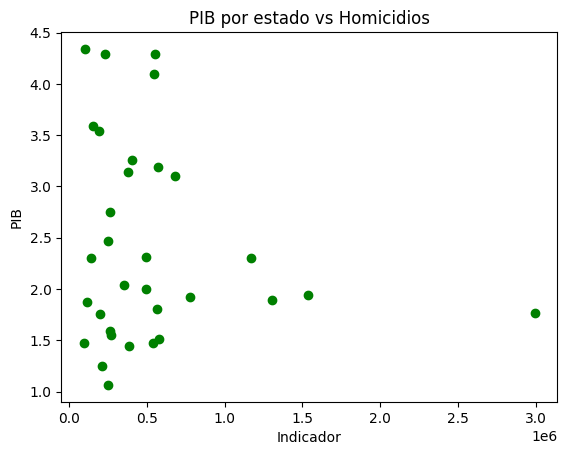

In [36]:
plt.plot(PIB, Homicidios, 'go')
plt.title('PIB por estado vs Homicidios')  
plt.xlabel('Indicador')
plt.ylabel('PIB')
plt.show()